In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns
import quilt3

from variance_fov_colony.data.load_dataset import load_imaging_mode, load_image_date

### Load and prepare csv
Load metadata colony/passaging csv from quilt 

In [2]:
p = quilt3.Package.browse(
    "calystay/meta_colony_passaging", "s3://allencell-internal-quilt"
)
df_meta = p["metadata.csv"]()
df_meta.head()

Loading manifest: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3012.43entries/s]


FOVId  WellId  CellId  meta_fov_outside_overview  meta_fov_xcoord  \
0  10217  106516  466245                      False           1155.0   
1  10217  106516  466246                      False           1155.0   
2  10217  106516  466248                      False           1155.0   
3  10217  106516  466252                      False           1155.0   
4  10217  106516  466254                      False           1155.0   

   meta_fov_ycoord  meta_fov_edgedist  meta_colony_touching_boundary  \
0            814.0         213.741796                          False   
1            814.0         213.741796                          False   
2            814.0         213.741796                          False   
3            814.0         213.741796                          False   
4            814.0         213.741796                          False   

   meta_colony_area_sum  meta_colony_count  meta_colony_area  \
0              629966.0               47.0           38386.0   
1              629966.0               47.0           38386.0   
2              629966.0               47.0           38386.0   
3              629966.0               47.0           38386.0   
4              629966.0               47.0           38386.0   

  meta_colony_coords  meta_colony_dist_center  meta_plate_bad_segmentation  \
0        (871, 1168)               458.633296                        False   
1        (871, 1168)               458.633296                        False   
2        (871, 1168)               458.633296                        False   
3        (871, 1168)               458.633296                        False   
4        (871, 1168)               458.633296                        False   

   meta_confluency meta_source_vial_id  meta_source_passage  \
0         0.469114     AI0054:00007406                 26.0   
1         0.469114     AI0054:00007406                 26.0   
2         0.469114     AI0054:00007406                 26.0   
3         0.469114     AI0054:00007406                 26.0   
4         0.469114     AI0054:00007406                 26.0   

   meta_passage_total  meta_passage_post_thaw  meta_flag_cell_population  
0                  28                     2.0                      False  
1                  28                     2.0                      False  
2                  28                     2.0                      False  
3                  28                     2.0                      False  
4                  28                     2.0                      False

Load shape space csv from isilon

In [5]:
df_shape_space = pd.read_csv(r'\\allen\aics\assay-dev\MicroscopyOtherData\Viana\projects\cell_shape_variation\local_staging_beta\shapemode\manifest.csv')

# do not include colony info fields here
# df_shape_space = df_shape_space[[x for x in df_shape_space.columns if x.startswith('meta') is False]]
# df_shape_space.columns.values.tolist()

#df_all = df_shape_space.merge(df_meta, on=['CellId', 'FOVId', 'WellId'], how='inner')

c:\users\calystay\appdata\local\continuum\anaconda3\envs\variance_fov_colony\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (31,35,37,42,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df_shape_space.columns.values.tolist()

['CellId',
 'structure_name',
 'pair',
 'this_cell_nbr_complete',
 'this_cell_nbr_dist_3d',
 'this_cell_nbr_dist_2d',
 'this_cell_nbr_overlap_area',
 'roi',
 'crop_raw',
 'crop_seg',
 'name_dict',
 'scale_micron',
 'edge_flag',
 'FOVId',
 'fov_path',
 'fov_seg_path',
 'struct_seg_path',
 'this_cell_index',
 'stack_min_z',
 'stack_max_z',
 'image_size',
 'PlateId',
 'meta_fov_position',
 'ScopeId',
 'WellId',
 'well_name',
 'passage',
 'meta_imaging_mode',
 'MitoticStateId',
 'Complete',
 'cell_stage',
 'meta_fov_outside_overview',
 'meta_fov_xcoord',
 'meta_fov_ycoord',
 'meta_fov_edgedist',
 'meta_colony_touching_boundary',
 'meta_colony_label',
 'meta_colony_centroid',
 'meta_colony_area_sum',
 'meta_colony_count',
 'meta_colony_area',
 'meta_colony_diameter',
 'meta_plate_bad_segmentation',
 'meta_plate_path_segmentation',
 'meta_plate_path_mask',
 'meta_plate_confluency',
 'SourceVialId',
 'meta_well_passage_at_imaging',
 'meta_well_passage_at_thaw',
 'InstrumentId',
 'WorkflowId',

Load imaging mode csv from package (read from csv, packaged in a function)

In [4]:
df_imaging_mode = load_imaging_mode()
df_all = df_all.merge(df_imaging_mode, on=['WellId'])

Load imaging date csv from isilon

In [5]:
df_image_date = load_image_date()
df_all = df_all.merge(df_image_date, on=['WellId'])

Check after merges

In [8]:

df.to_csv(r'\\allen\aics\microscopy\Data\fov_in_colony_rnd\data_analysis.csv')

NameError: name 'df_all' is not defined

In [7]:
df = df_all.copy()
df = df[['structure_name', 'meta_passage_total', 'meta_passage_post_thaw']].drop_duplicates()

print(len(df['structure_name'].unique()))

for structure in df['structure_name'].unique():
    print(structure)
    print('meta_passage_total: ')
    print (df.loc[df['structure_name'] == structure, 'meta_passage_total'].values.tolist())
    print('meta_passage_post_thaw:')
    print(df.loc[df['structure_name'] == structure, 'meta_passage_post_thaw'].values.tolist())
    print('')

25
AAVS1
meta_passage_total: 
[28, 29, 30, 32, 31]
meta_passage_post_thaw:
[2.0, 3.0, 4.0, 6.0, 5.0]

ACTB
meta_passage_total: 
[36, 37, 39]
meta_passage_post_thaw:
[2.0, 3.0, 5.0]

ACTN1
meta_passage_total: 
[34, 35, 36, 37, 38, 33]
meta_passage_post_thaw:
[6.0, 7.0, 8.0, 9.0, 10.0, 5.0]

ATP2A2
meta_passage_total: 
[29, 34, 35, 30, 37, 28]
meta_passage_post_thaw:
[2.0, 7.0, 8.0, 3.0, 10.0, 1.0]

CETN2
meta_passage_total: 
[24, 25, 27, 28, 26]
meta_passage_post_thaw:
[2.0, 3.0, 5.0, 6.0, 4.0]

CTNNB1
meta_passage_total: 
[30, 31, 32]
meta_passage_post_thaw:
[3.0, nan, 5.0]

DSP
meta_passage_total: 
[38, 39, 40, 33, 28, 30]
meta_passage_post_thaw:
[7.0, 8.0, 9.0, 2.0, 5.0, 7.0]

FBL
meta_passage_total: 
[27, 29, 30, 31, 33, 34, 35, 36]
meta_passage_post_thaw:
[2.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0]

GJA1
meta_passage_total: 
[26, 27, 28, 29, 30]
meta_passage_post_thaw:
[1.0, 2.0, 3.0, 4.0, 5.0]

HIST1H2BJ
meta_passage_total: 
[30, 29, 31, 32, 34, 35, 33]
meta_passage_post_thaw:
[3.0

### Apply fliters - filter out cells that come from:
1. Bad 10X overview segmentation
2. Colonies that are touching the edge of well
3. Colonies that are outside of 10X overview
4. Wells that have unclear/unverified documentation of passaging info
5. FOVs from ZSD1 collected after 2020-06-15

In [20]:
df = df_all.loc[
    (df_all['meta_plate_bad_segmentation'] == False)
    & (df_all['meta_colony_touching_boundary'] == False)
    & (df_all['meta_flag_cell_population'] == False)
    & (df_all['meta_fov_outside_overview'] == False)
    # & (((df_all['InstrumentId'] == 'ZSD-1') & (df_all['FOVImageDate'] > datetime.strptime('06-15-2020', '%m-%d-%Y'))) == False)
    # & (df_all['structure_name'].isin(['SMC1A', 'TUBA1B_44', 'LMNB1_44', 'SON']) == False)
]

print(len(df['FOVId'].unique()))

8563


In [9]:
len(df_all)

178501

In [7]:
# add protocol info
df['protocol'] = 'old_matrigel'
df.loc[df['structure_name'].isin(['SMC1A', 'SON', 'TUBA1B_44', 'LMNB1_44']), 'protocol'] = 'new_matrigel'

df['WorkflowId'] = df['WorkflowId'].str[2:-2]

c:\users\calystay\appdata\local\continuum\anaconda3\envs\variance_fov_colony\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\calystay\appdata\local\continuum\anaconda3\envs\variance_fov_colony\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\calystay\appdata\local\continuum\anaconda3\envs\variance_fov_colony\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

In [14]:
# replace all structure_names into groups of ['H2B', 'NUP153', 'others']
df.loc[df['structure_name'].isin(['H2B', 'NUP153', ]) == False, 'structure_name'] = 'others'

In [15]:
# Run this to create the 4th group of H2B + NUP153
# replace structure in ['H2B', 'NUP153'] as 'representative_cell_line'

df_add = df.loc[df['structure_name'].isin(['H2B', 'NUP153'])]
df_add['structure_name'] = 'combined_H2B_NUP153'
df = df.append(df_add, ignore_index=True)

c:\users\calystay\appdata\local\continuum\anaconda3\envs\variance_fov_colony\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Check outlier data

## Get counts of cells per cell line

In [9]:
for struc in df['structure_name'].unique():
    print(struc)
    df_cell = df.loc[df['structure_name'] == struc]

    print('total: ' + str(len(df_cell)))

    # mode distribution
    for mode in np.sort(df_cell['ImagingMode'].unique()):
        print('mode ' + mode + ': ' + str(len(df_cell.loc[df_cell['ImagingMode'] == mode])))

    # instrument distribution
    for instrument in np.sort(df_cell['InstrumentId'].unique()):
        print(instrument + ': ' + str(len(df_cell.loc[df_cell['InstrumentId'] == instrument])))

    # pipeline distribution
    for workflow in np.sort(df_cell['WorkflowId'].unique()):
        print(workflow + ': ' + str(len(df_cell.loc[df_cell['WorkflowId'] == workflow])))

    # number of wells imaged from
    print('total number of wells: ' + str(len(df_cell['WellId'].unique())))
    #for well in np.sort(df_cell['WellId'].unique()):
    #    print(str(well) + ': ' + str(len(df_cell.loc[df_cell['WellId'] == well])))

    print('')


AAVS1
total: 2486
mode Mode A: 561
mode Mode B: 1296
mode Mode C: 629
ZSD-2: 471
ZSD-3: 2015
Pipeline 4.2: 2486
total number of wells: 51

ACTB
total: 2478
mode Mode A: 537
mode Mode B: 1177
mode Mode C: 764
ZSD-1: 1028
ZSD-2: 441
ZSD-3: 1009
Pipeline 4.1: 2478
total number of wells: 45

ACTN1
total: 2970
mode Mode A: 407
mode Mode B: 1559
mode Mode C: 1004
ZSD-1: 569
ZSD-3: 2401
Pipeline 4.2: 2970
total number of wells: 83

ATP2A2
total: 8319
mode Mode A: 8124
mode Mode C: 195
ZSD-1: 1183
ZSD-3: 7136
Pipeline 4.4: 8319
total number of wells: 169

CETN2
total: 3995
mode Mode A: 173
mode Mode B: 1525
mode Mode C: 2297
ZSD-2: 2429
ZSD-3: 1566
Pipeline 4.2: 3995
total number of wells: 93

CTNNB1
total: 1748
mode Mode A: 994
mode Mode C: 754
ZSD-1: 633
ZSD-2: 110
ZSD-3: 1005
Pipeline 4.2: 1748
total number of wells: 61

DSP
total: 4650
mode Mode A: 1771
mode Mode B: 1681
mode Mode C: 1198
ZSD-1: 2081
ZSD-2: 248
ZSD-3: 2321
Pipeline 4: 4650
total number of wells: 114

FBL
total: 4429
mode M

## Set plotting settings

In [25]:
mode = 'Mode A'

alpha_settings = {
    'expand_density_cell_area_2dmid': 0.7,
    'expand_density_neigh_dist_median': 0.7,
    'expand_density_fov_area_2dmid': 0.5,
    'mem_shape_volume_lcc': 0.2,
    'mem_position_depth_lcc': 0.2
}

# utility function to get imaging order for structures in a dataframe 
def get_imaging_order(df, structure_list, order_mode='median'):
    structure_date = {}
    for structure in structure_list:
        if order_mode == 'median':
            struc_time = df.loc[df['structure_name'] == structure, 'FOVImageDate'].quantile(0.5)
        elif order_mode == 'min':
            struc_time = df.loc[df['structure_name'] == structure, 'FOVImageDate'].quantile(0)
        elif order_mode == 'min':
            struc_time = df.loc[df['structure_name'] == structure, 'FOVImageDate'].quantile(1)
        elif order_mode == 'median_month':
            struc_time = df.loc[df['structure_name'] == structure, 'FOVImageDate'].quantile(0.5).month_name()
        elif order_mode == 'min_month':
            struc_time = df.loc[df['structure_name'] == structure, 'FOVImageDate'].quantile(0).month_name()
        elif order_mode == 'max_month':
            struc_time = df.loc[df['structure_name'] == structure, 'FOVImageDate'].quantile(1).month_name()

        structure_date.update({structure: struc_time})
    sort_date = sorted(structure_date.items(), key=lambda x: x[1], reverse=False)
    sorted_structure_list = []
    for struc, time in sort_date:
        sorted_structure_list.append(struc)

    return structure_date, sorted_structure_list


df_plot = df.loc[df['ImagingMode'] == mode]

Plot variation in distribution by colony features ordered by imaging month

In [26]:
# Plot colony features versus ordered structures, colored by imaging month
colony_metrics = ['meta_fov_edgedist', 'meta_confluency', 'meta_colony_dist_center', 'meta_colony_area']
struc_date, imaging_order = get_imaging_order(df_plot, df_plot['structure_name'].unique(), order_mode='median')

struc_month, order_month = get_imaging_order(df_plot, df_plot['structure_name'].unique(), order_mode='median_month')

for index, row in df_plot.iterrows():
    df_plot.loc[index, 'ImagingMonth'] = struc_month[row['structure_name']]

c:\users\calystay\appdata\local\continuum\anaconda3\envs\variance_fov_colony\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [62]:
# Run this if comparing 4 groups, instead of all structures
imaging_order = ['others', 'H2B', 'NUP153', 'combined_H2B_NUP153']

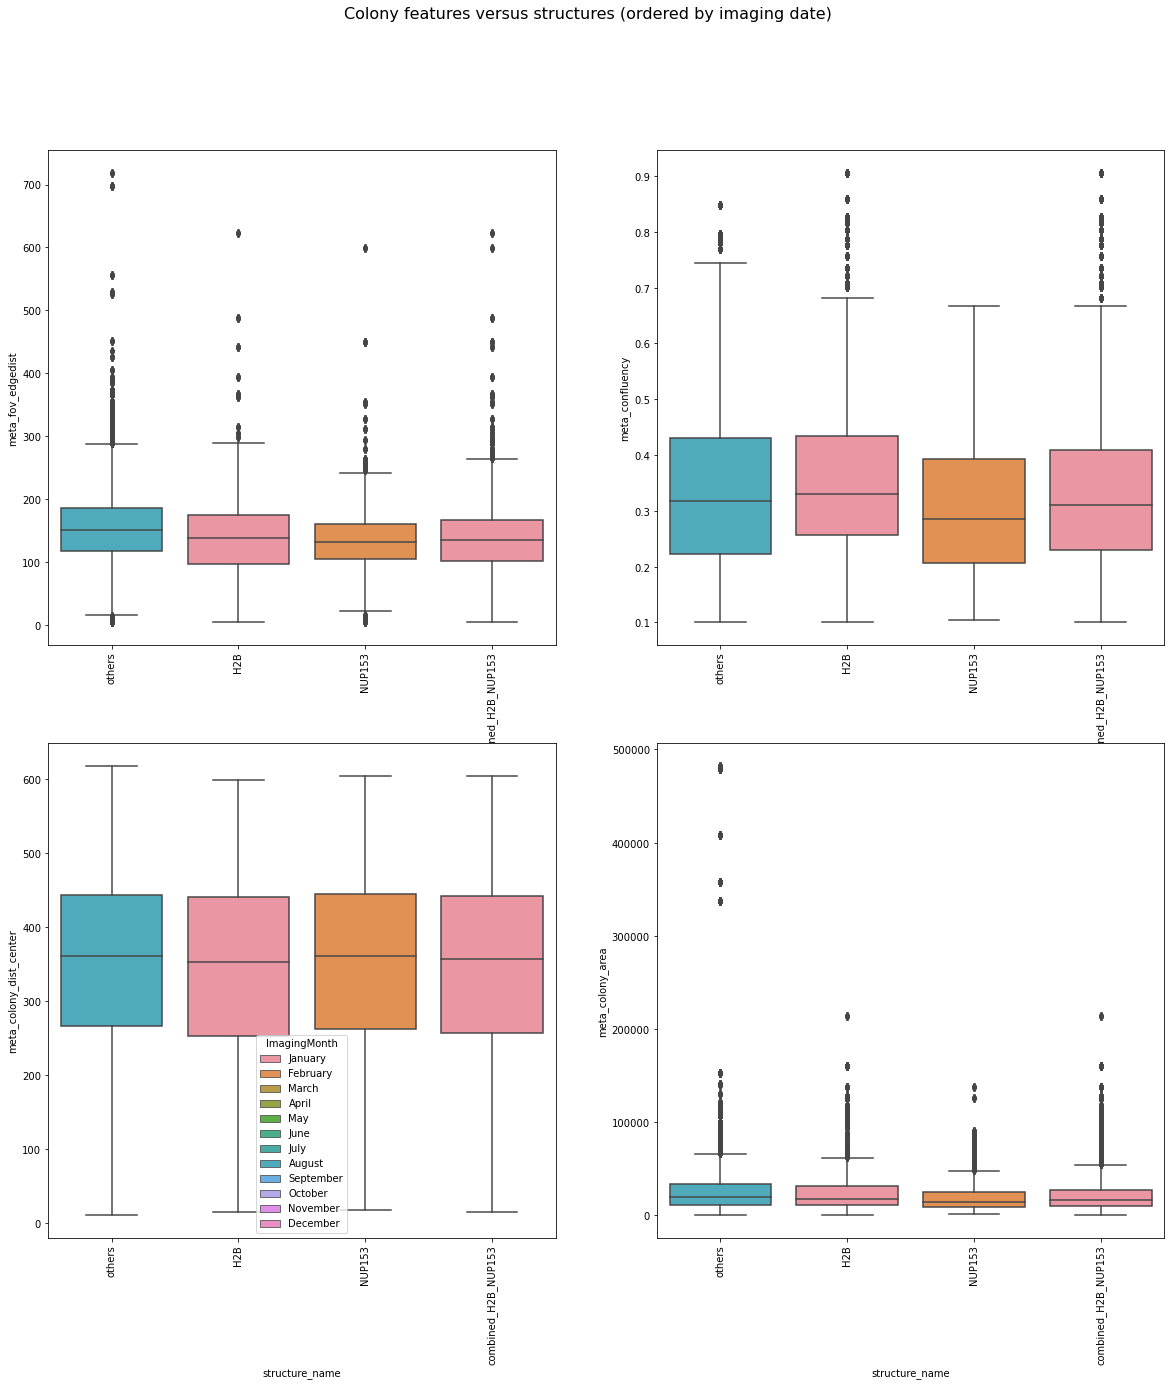

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
count = 0
for row in range (0, 2):
    for col in range (0, 2):
        g = sns.boxplot(
            x='structure_name',
            y=colony_metrics[count],
            data=df_plot,
            ax=ax[row, col],
            order=imaging_order,
            hue='ImagingMonth',
            dodge=False,
            hue_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                       'November', 'December']
        )
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
        count += 1
        if count != 3:
            g._remove_legend(g.get_legend())
# fig.savefig(os.path.join(plot_folder, 'mode_' + mode + '_colony_violin.png'))
fig.suptitle('Colony features versus structures (ordered by imaging date)', size=16)
plt.show()

Plot colony features versus median imaging date of structure

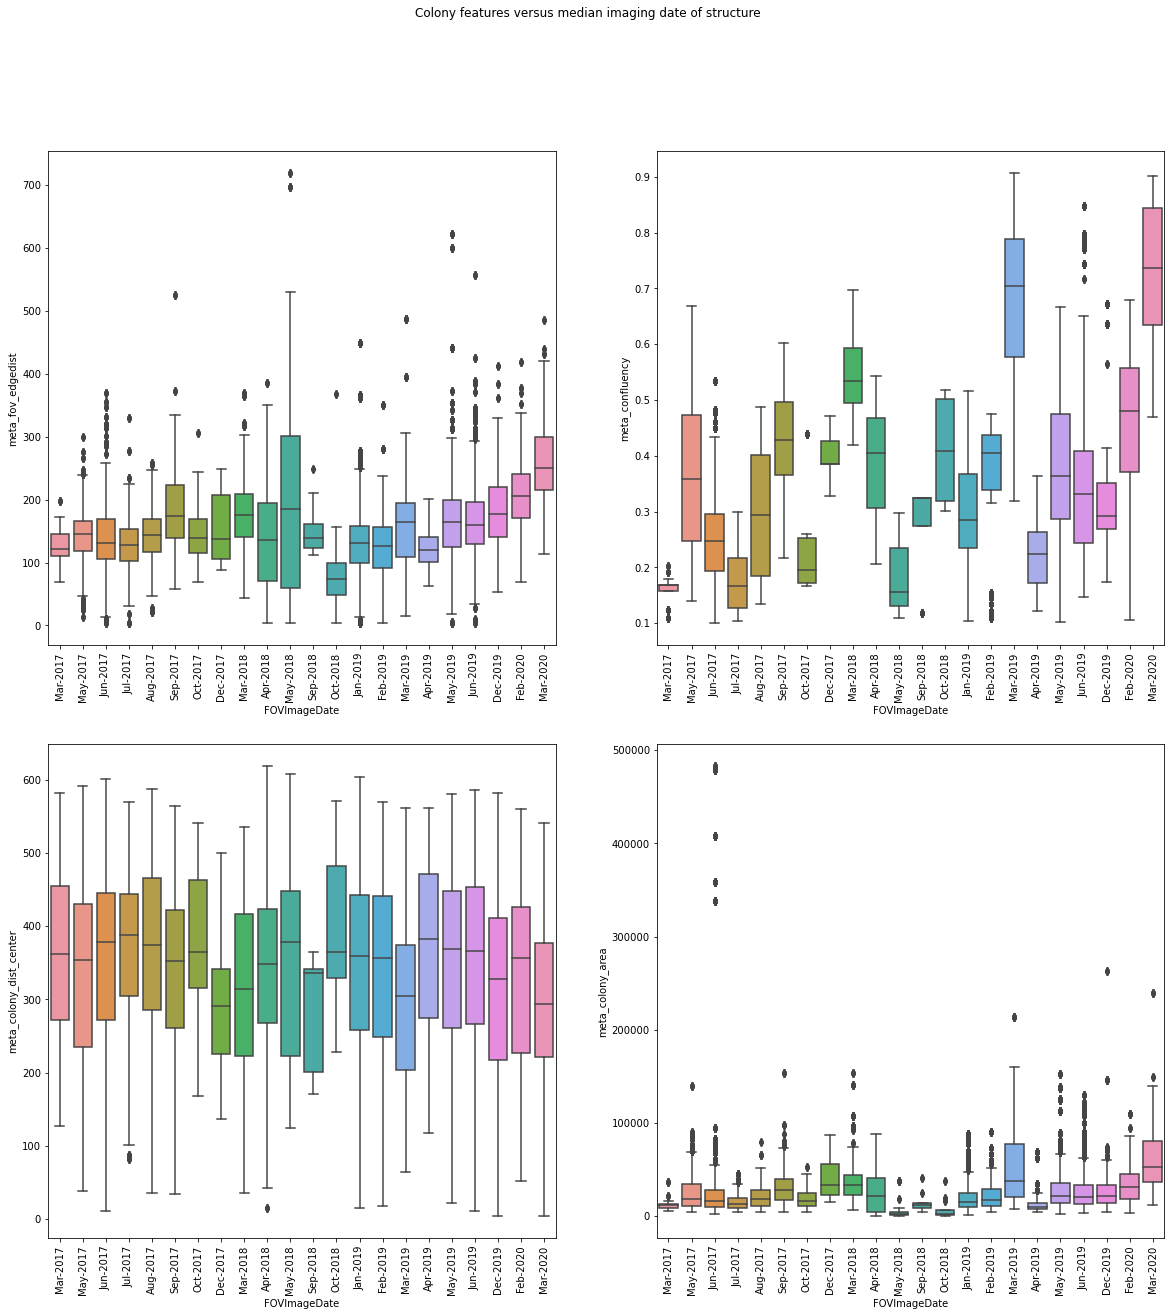

In [45]:
# Plot colony features versus median imaging date of structure
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
count = 0
for row in range (0, 2):
    for col in range (0, 2):
        g = sns.boxplot(
            x=df_plot['FOVImageDate'].dt.strftime('%b-%Y'),
            y=colony_metrics[count],
            data=df_plot, ax=ax[row, col],
            order=pd.to_datetime(df_plot['FOVImageDate'].dt.strftime('%b-%Y').unique()).sort_values().strftime('%b-%Y')
        )
        g.set_xticklabels(g.get_xticklabels(), rotation=90)
        count += 1
fig.suptitle('Colony features versus median imaging date of structure')
# fig.savefig(os.path.join(plot_folder, 'mode_' + mode + '_colony_by_month_violin.png'))
plt.show()

Plot variation in distribution by cell features

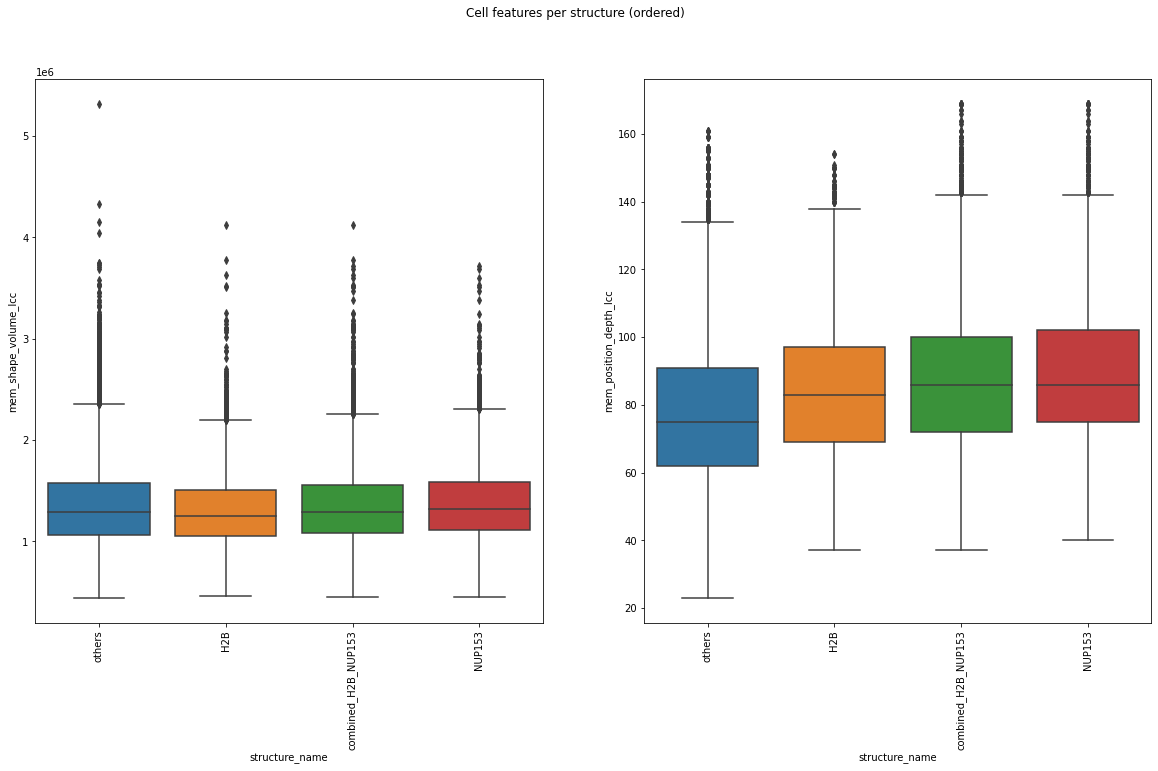

In [19]:
cell_feas = ['mem_shape_volume_lcc', 'mem_position_depth_lcc']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
count = 0
for row in range (0, 1):
    for col in range (0, 2):
        if count < len(cell_feas):
            g = sns.boxplot(x='structure_name', y=cell_feas[count],
                            data=df_plot, ax=ax[col],
                            order=imaging_order)
            g.set_xticklabels(g.get_xticklabels(), rotation=90)
            count += 1
            if count > 1:
                g._remove_legend(g.get_legend())

# fig.savefig(os.path.join(plot_folder, 'mode_' + mode + '_density_violin.png'))
fig.suptitle('Cell features per structure (ordered)')
plt.show()

In [73]:
imaging_order

['TUBA1B',
 'LMNB1',
 'TOMM20',
 'DSP',
 'SEC61B',
 'ACTB',
 'ST6GAL1',
 'MYH10',
 'TJP1',
 'FBL',
 'CETN2',
 'GJA1',
 'AAVS1',
 'ACTN1',
 'PXN',
 'NPM1',
 'CTNNB1',
 'SLC25A17',
 'RAB5A',
 'H2B',
 'NUP153',
 'ATP2A2',
 'SMC1A',
 'SON',
 'LMNB1_44',
 'TUBA1B_44']

Plot colony features against cell features  

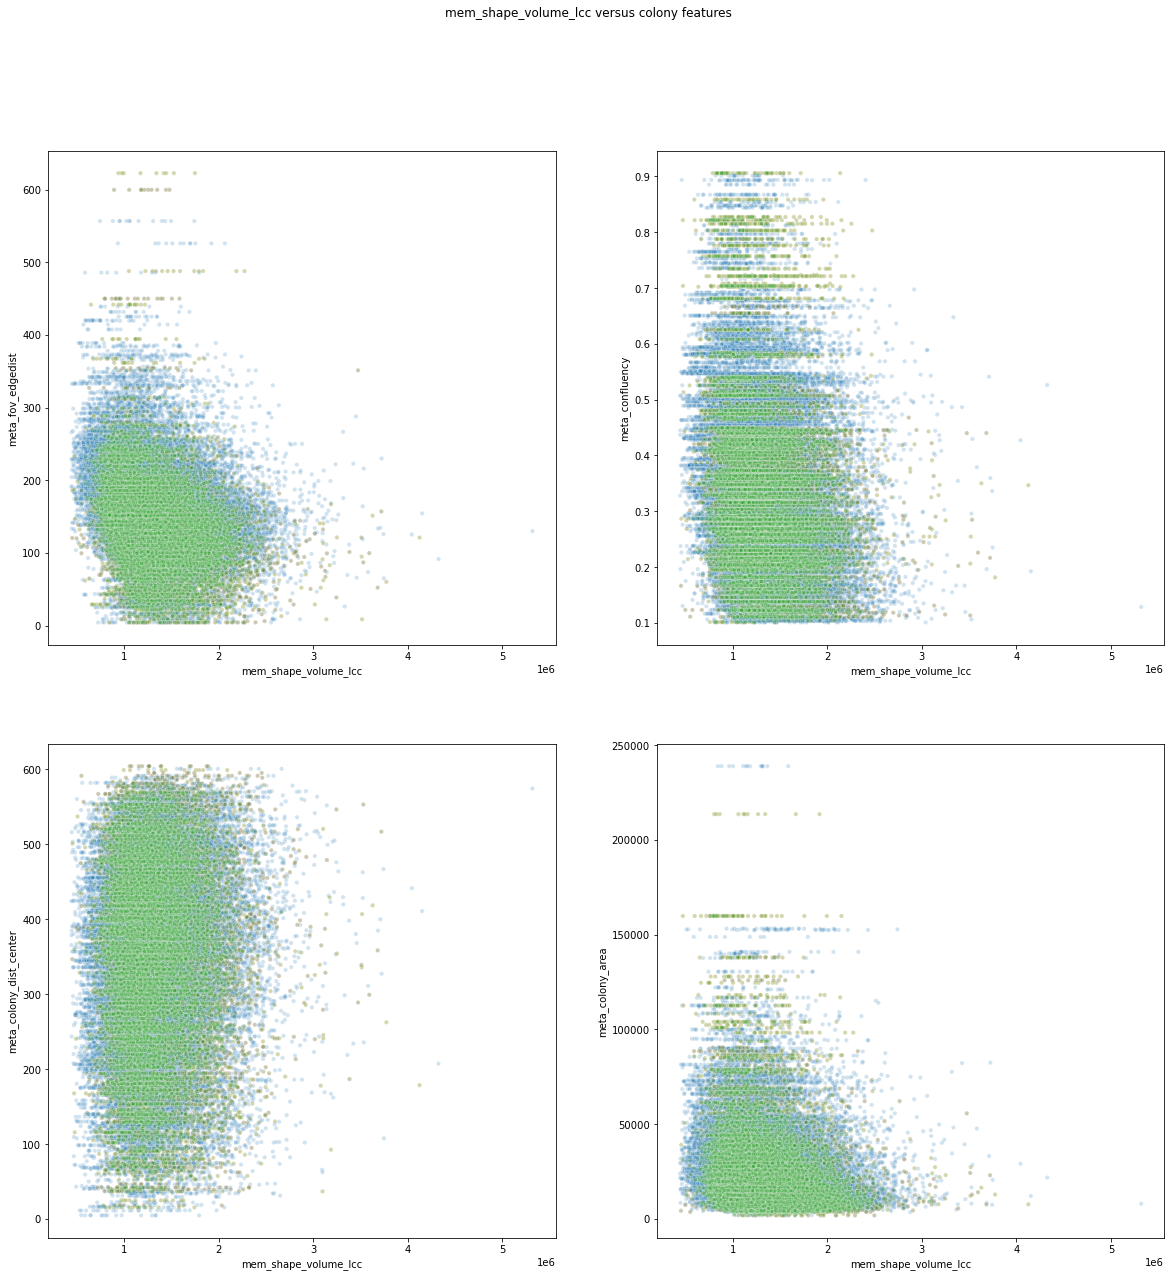

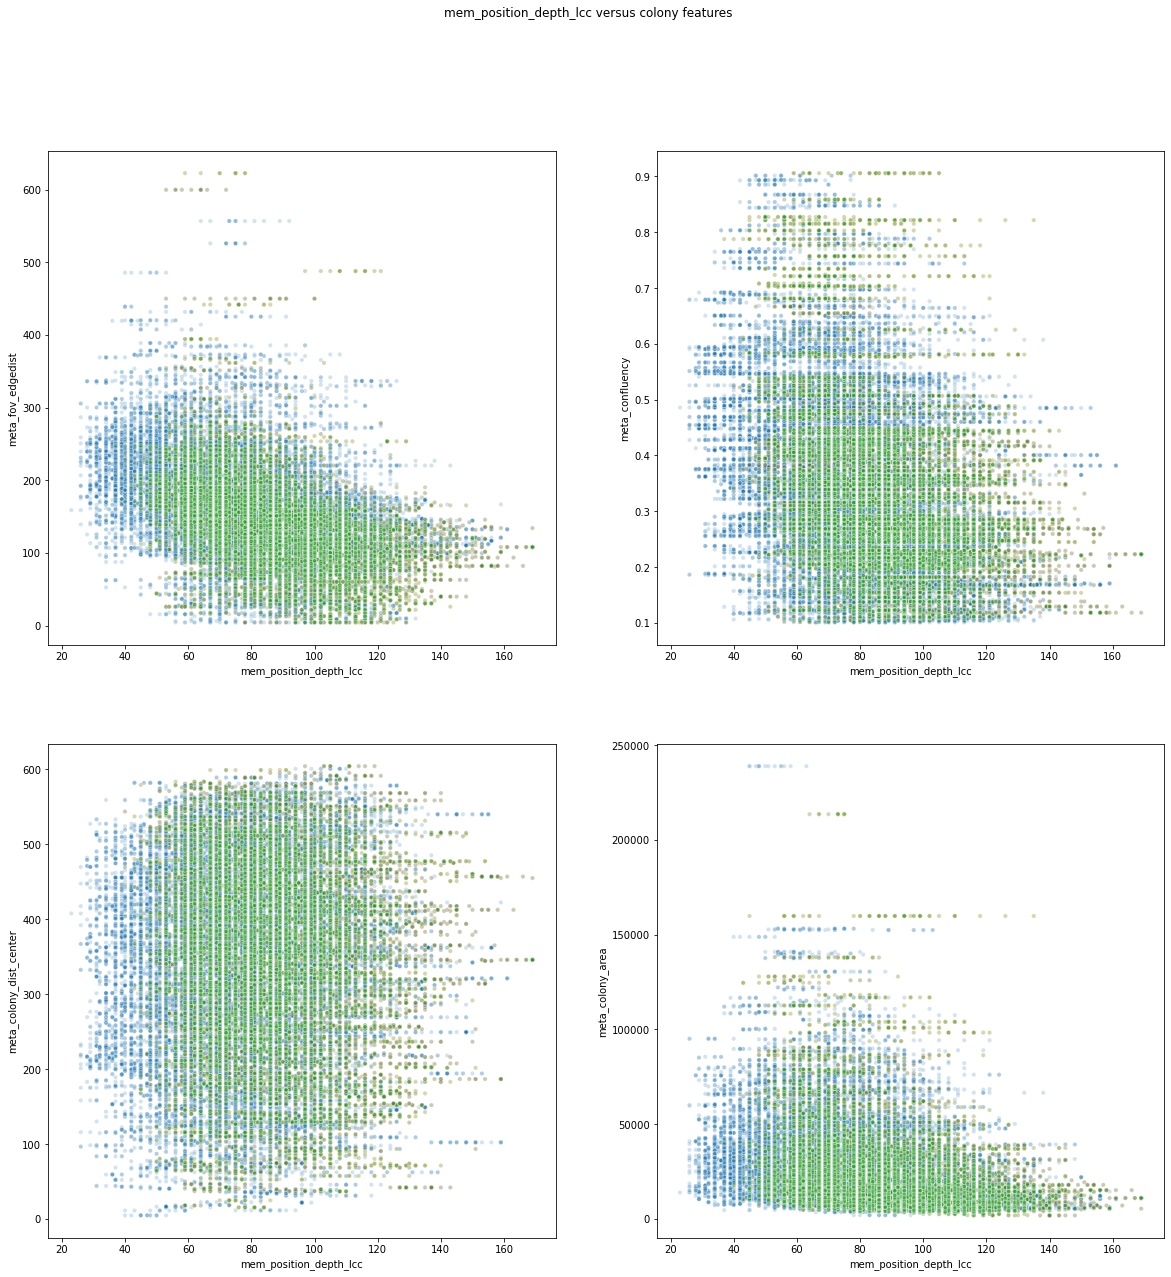

In [20]:
for cell_fea in cell_feas:
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    count = 0
    for row in range(0, 2):
        for col in range(0, 2):
            if count < len(colony_metrics):
                g = sns.scatterplot(x=cell_fea, y=colony_metrics[count], hue='structure_name',
                                    hue_order=imaging_order, data=df_plot.loc[df_plot['protocol'] == 'old_matrigel'],
                                    ax=ax[row, col], alpha=alpha_settings[cell_fea], size=1)
                count += 1
                if count != 5:
                    g._remove_legend(g.get_legend())
    # fig.savefig(os.path.join(plot_folder, 'mode_' + mode + '_' + density_metric + '.png'))
    fig.suptitle(cell_fea + ' versus colony features')
    plt.show()
    

Make animation for colony features against cell features

In [ ]:
from matplotlib import animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1.0, metadata=dict(artist='Me'),) #bitrate=1800)

# Set range for x-axis and y-axis
plot_lim = {
    'meta_confluency': (0, 1),
    'meta_colony_area': (0, 500000),
    'meta_fov_edgedist': (0, 700),
    'log(meta_colony_area)': (6, 14),
    'mem_shape_volume_lcc': (0, 5000000),
    'mem_position_depth_lcc': (20, 180)
}

# for each scatterplot, save out as individual animation
for x_axis in ['meta_confluency', 'meta_colony_area', 'meta_fov_edgedist', 'log(meta_colony_area)']:
    for y_axis in ['mem_shape_volume_lcc', 'mem_position_depth_lcc']:

        fig = plt.figure()
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.xlim(plot_lim[x_axis])
        plt.ylim(plot_lim[y_axis])

        # plt.legend(fontsize='xx-small')
        def animate(i):
            data = df_plot.loc[df_plot['structure_name'] == imaging_order[i]]
            # plt.figure()
            graph = sns.scatterplot(y=y_axis, x=x_axis, data=data,
                                    size=1, alpha=0.5)
            graph.set_title(imaging_order[i])
            #fig.title = imaging_order[i]
            graph._remove_legend(graph.get_legend())

        ani = animation.FuncAnimation(fig, animate, frames=len(imaging_order), interval=1000, repeat=False)
        ani.save(os.path.join(plot_folder, y_axis +'_vs_' + x_axis + '.mp4'), writer=writer)

## Passaging features

In [50]:
# Prepare data
df_well = df_plot[
    ['structure_name', 'dataset',
     'InstrumentId', 'WorkflowId', 'ImagingMode', 'WellId',
     'meta_confluency', 'meta_colony_count',
     # 'SourceVialId',
     'meta_source_passage', 'meta_passage_total', 'meta_passage_post_thaw'
     ]
].drop_duplicates()

df_fov = df_plot[
    [
        'structure_name', 'FOVId', 'fov_path', 'dataset',
        'InstrumentId', 'WorkflowId', 'ImagingMode', 'WellId',
        'meta_fov_edgedist', 'meta_confluency', 'meta_colony_dist_center', 'meta_colony_area', 'meta_colony_count',
        'meta_source_passage', 'meta_passage_total', 'meta_passage_post_thaw',
        'mem_shape_volume_lcc', 'mem_position_depth_lcc'
    ]
].drop_duplicates()

General statistics for passaging distribution (Labeling seems wrong, need to fix!)


c:\users\calystay\appdata\local\continuum\anaconda3\envs\variance_fov_colony\lib\site-packages\seaborn\axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


<Figure size 432x288 with 0 Axes>

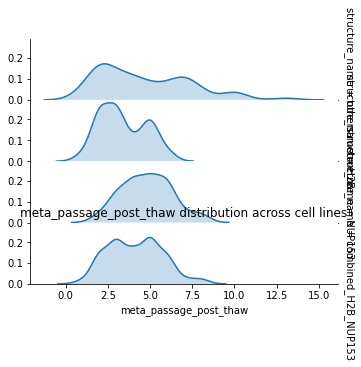

c:\users\calystay\appdata\local\continuum\anaconda3\envs\variance_fov_colony\lib\site-packages\seaborn\axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


<Figure size 432x288 with 0 Axes>

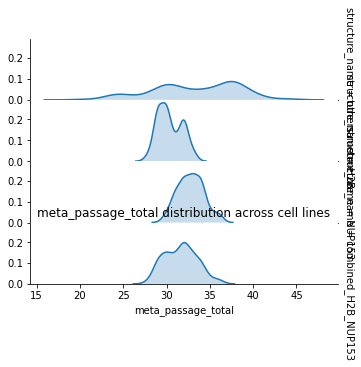

In [51]:
for passage_metric in ['meta_passage_post_thaw', 'meta_passage_total']:
    plt.figure()
    g = sns.FacetGrid(df_well, row="structure_name", row_order=df_well['structure_name'].unique(),
                      height=1, aspect=5, gridspec_kws={'hspace': 0.0},
                      margin_titles=True)
    g.map(sns.kdeplot, passage_metric, shade=True)
    plt.title(passage_metric + ' distribution across cell lines')
    # plt.savefig(os.path.join(plot_folder, passage_metric + '_across_all.png'))
    plt.show()

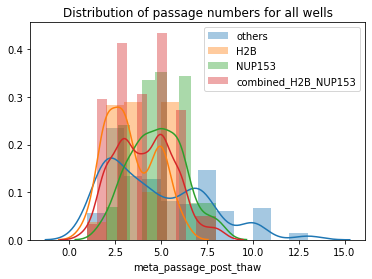

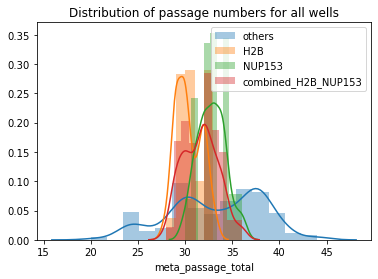

In [52]:
for passage_metric in ['meta_passage_post_thaw', 'meta_passage_total']:
    plt.figure()
    # for struc in ['H2B', 'MYH10', 'NUP153', 'RAB5A', 'SLC25A17']:
    for struc in df_well['structure_name'].unique():
        df_struc = df_well.loc[df_well['structure_name'] == struc]
        sns.distplot(a=df_struc[passage_metric], label=struc)
    plt.legend()
    plt.title('Distribution of passage numbers for all wells')
    # plt.savefig(os.path.join(plot_folder, 'per_well_' + passage_metric + '_dist.png'))
    plt.show()

Plot number of unique passages

In [53]:
df_passage_count = pd.DataFrame()
# for struc in ['H2B', 'MYH10', 'NUP153', 'RAB5A', 'SLC25A17']:
for struc in df_well['structure_name'].unique():
    count_passage = df_well.loc[df_well['structure_name'] == struc, 'meta_passage_post_thaw'].unique()
    # median_density = df_fov.loc[df_fov['structure_name'] == struc, 'expand_density_fov_area_2dmid'].median()
    row = {}
    row['structure_name'] = struc
    row['number_unique_passages'] = len(count_passage)
    # row['median_density'] = median_density
    row['median_volume'] = df_fov.loc[df_fov['structure_name'] == struc, 'mem_shape_volume_lcc'].median()
    row['median_height'] = df_fov.loc[df_fov['structure_name'] == struc, 'mem_position_depth_lcc'].median()
    df_passage_count = df_passage_count.append(row, ignore_index=True)

df_fov = df_fov.merge(df_passage_count, on='structure_name')   
    
list_structures_more_passages = sorted(df_fov.loc[df_fov['number_unique_passages'] > 2, 'structure_name'].unique())


Plot median cell features versus unique passages

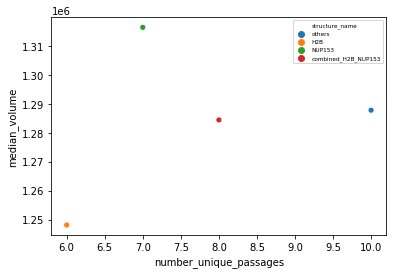

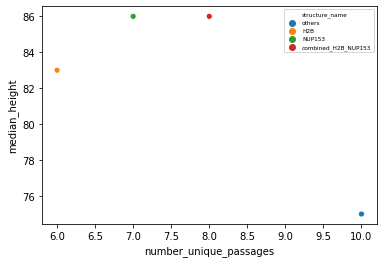

In [54]:
for median_value in ['median_volume', 'median_height']:
    plt.figure()
    ax = sns.scatterplot(x='number_unique_passages', y=median_value, data=df_passage_count,
                         hue='structure_name',
                         )
    # plt.ylim((0.002, 0.008))
    plt.legend(fontsize='xx-small')
    # plt.savefig(os.path.join(plot_folder, 'per_' + imaging_mode[-1] + '_' + median_value + '_vs_number_unique_passages.png'))
    plt.show()

## Plot passaging features vs colony features

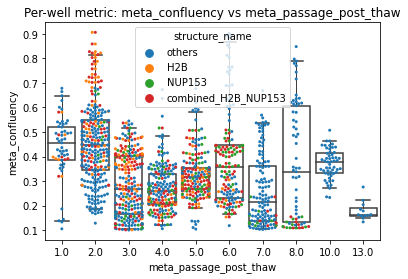

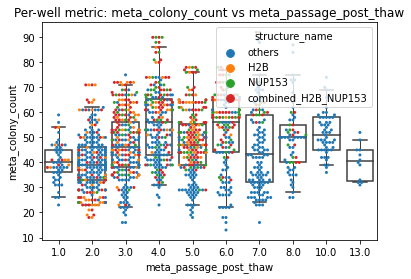

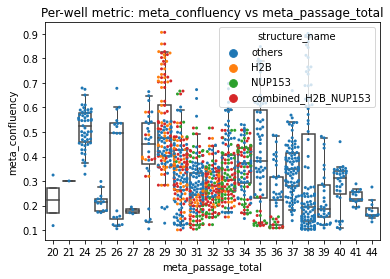

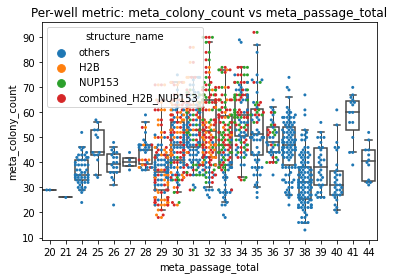

In [55]:
for passage_metric in ['meta_passage_post_thaw', 'meta_passage_total']:
    for well_metric in ['meta_confluency', 'meta_colony_count']:
        plt.figure()
        ax = sns.swarmplot(x=passage_metric, y=well_metric, data=df_well, hue='structure_name', s=3)
        sns.boxplot(x=passage_metric, y=well_metric, data=df_well,
                    showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=False, whiskerprops={'linewidth': 1},
                    whis=[2.5, 97.5],
                    ax=ax)
        plt.title('Per-well metric: ' + well_metric + ' vs ' + passage_metric)
        # plt.savefig(os.path.join(plot_folder, 'per_well_' + well_metric + '_vs_' + passage_metric + '.png'))
        plt.show()

## Plot passaging features vs cell features

Prepare per-cell df

In [30]:
df_cell = df_plot.loc[df_plot['ImagingMode'] == mode]

df_passage_count = pd.DataFrame()
# for struc in ['H2B', 'MYH10', 'NUP153', 'RAB5A', 'SLC25A17']:
for struc in df_cell['structure_name'].unique():
    count_passage = df_cell.loc[df_cell['structure_name'] == struc, 'meta_passage_post_thaw'].unique()
    #median_density = df_cell.loc[df_cell['structure_name'] == struc, 'expand_density_cell_area_2dmip'].median()
    row = {}
    row['structure_name'] = struc
    row['number_unique_passages'] = len(count_passage)
    #row['median_density'] = median_density
    df_passage_count = df_passage_count.append(row, ignore_index=True)

df_cell = df_cell.merge(df_passage_count, on='structure_name')

list_structures_more_passages = sorted(df_cell.loc[df_cell['number_unique_passages'] > 2, 'structure_name'].unique())

Swarm plots for cell features versus passage features (takes a long time to process plot) 

In [ ]:
for passage_metric in ['meta_passage_post_thaw', 'meta_passage_total']:
    for density_metric in [ # 'expand_density_cell_area_2dmip', 'expand_density_cell_area_2dmid', 'expand_density_neigh_dist_median',
                           'mem_shape_volume_lcc', 'mem_position_depth_lcc']:
        plt.figure()
        ax = sns.swarmplot(x=passage_metric, y=density_metric,
                           data=df_cell.loc[df_cell['structure_name'].isin(list_structures_more_passages)],
                           hue='structure_name',
                           alpha=0.7, s=1)
        sns.boxplot(x=passage_metric, y=density_metric,
                    data=df_cell.loc[df_cell['structure_name'].isin(list_structures_more_passages)],
                    showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=False, whiskerprops={'linewidth': 1},
                    whis=[2.5, 97.5],
                    ax=ax)
        plt.title(density_metric + ' vs ' + passage_metric + ' for ' + mode + ' FOVs')
        plt.show()
#         plt.savefig(os.path.join(plot_folder, 'per_' + imaging_mode[
#             -1] + '_cell_' + density_metric + '_vs_' + passage_metric + '.png'))


Plot cell features distribution per passage, separated by cell line within same passage

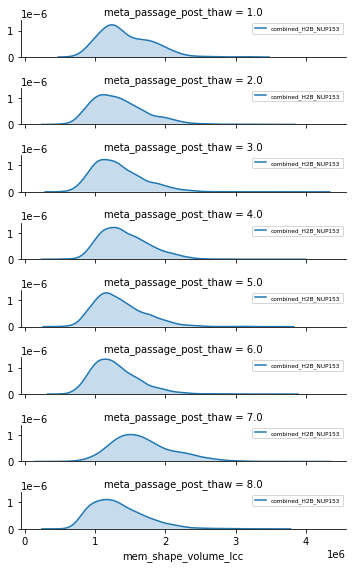

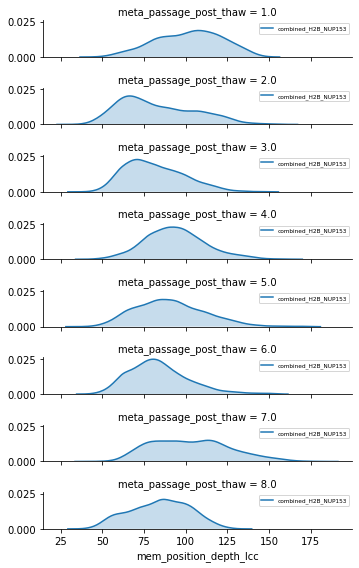

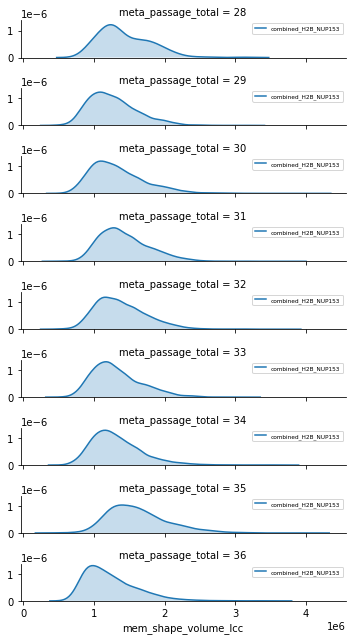

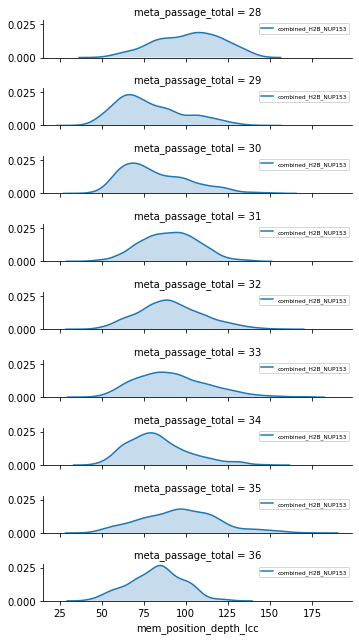

In [56]:
for passage_metric in ['meta_passage_post_thaw', 'meta_passage_total']:
    for cell_metric in ['mem_shape_volume_lcc', 'mem_position_depth_lcc',
                        # 'expand_density_cell_area_2dmip', 'expand_density_cell_area_2dmid', 'expand_density_neigh_dist_median'
                       ]:
        g = sns.FacetGrid(df_cell, row=passage_metric, row_order=sorted(df_cell[passage_metric].unique()),
                          height=1, aspect=5,  # gridspec_kws={'hspace': 0.0},
                          hue="structure_name",
                          margin_titles=False,
                          legend_out=False)
        g.map(sns.kdeplot, cell_metric, shade=True)
        for ax in g.axes.ravel():
            ax.legend(fontsize='xx-small')
        # plt.savefig(os.path.join(plot_folder, 'per_' + imaging_mode[-1] + '_cell_' + cell_metric + '_vs_' + passage_metric + '_hist.png'))
        plt.show()

In [ ]:
# check df)cell
df_cell.loc[df_cell['InstrumentId'] == 'ZSD-1', 'FOVImageDate'].max()

Plot cell features against passage features for cell lines with more variations in passage numbers (take a long time to plot!) 

In [ ]:
for passage_metric in ['meta_passage_post_thaw', 'meta_passage_total']:
    for density_metric in [ # 'expand_density_cell_area_2dmip', 'expand_density_cell_area_2dmid', 'expand_density_neigh_dist_median',
                           'mem_shape_volume_lcc', 'mem_position_depth_lcc']:
        plt.figure()
        ax = sns.swarmplot(x=passage_metric, y=density_metric,
                           data=df_cell.loc[df_cell['structure_name'].isin(list_structures_more_passages)],
                           hue='structure_name',
                           alpha=0.7, s=2)
        sns.boxplot(x=passage_metric, y=density_metric,
                    data=df_cell.loc[df_cell['structure_name'].isin(list_structures_more_passages)],
                    showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=False, whiskerprops={'linewidth': 1},
                    whis=[2.5, 97.5],
                    ax=ax)
        plt.title(density_metric + ' vs ' + passage_metric + ' for ' + mode + ' FOVs')
        plt.show()
#         plt.savefig(os.path.join(plot_folder, 'per_' + imaging_mode[
#             -1] + '_cell_' + density_metric + '_vs_' + passage_metric + '.png'))

Plot cell features against passaging features (box plot)

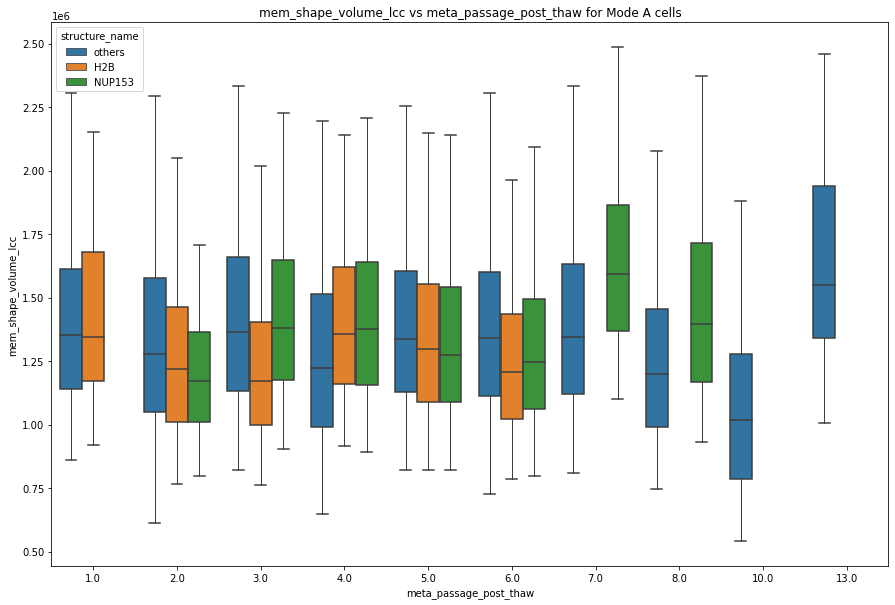

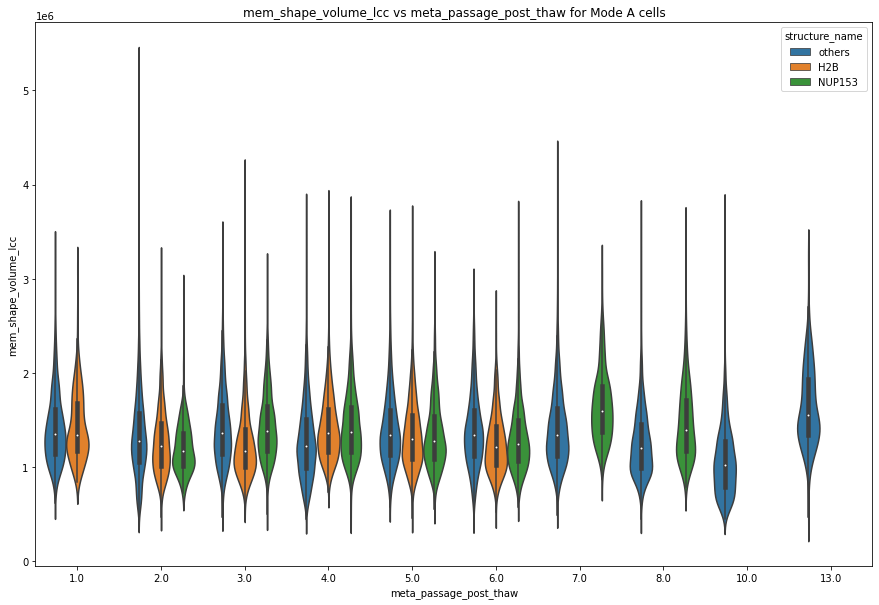

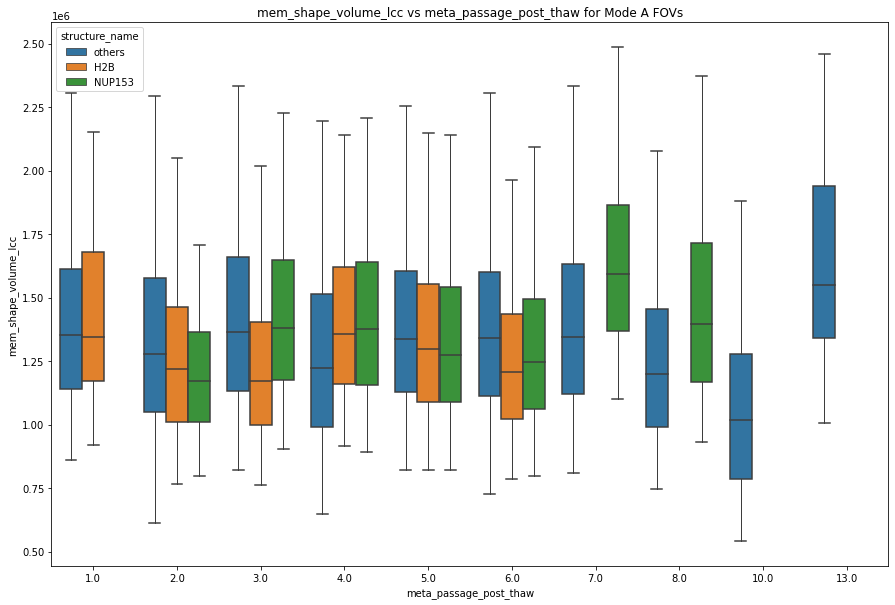

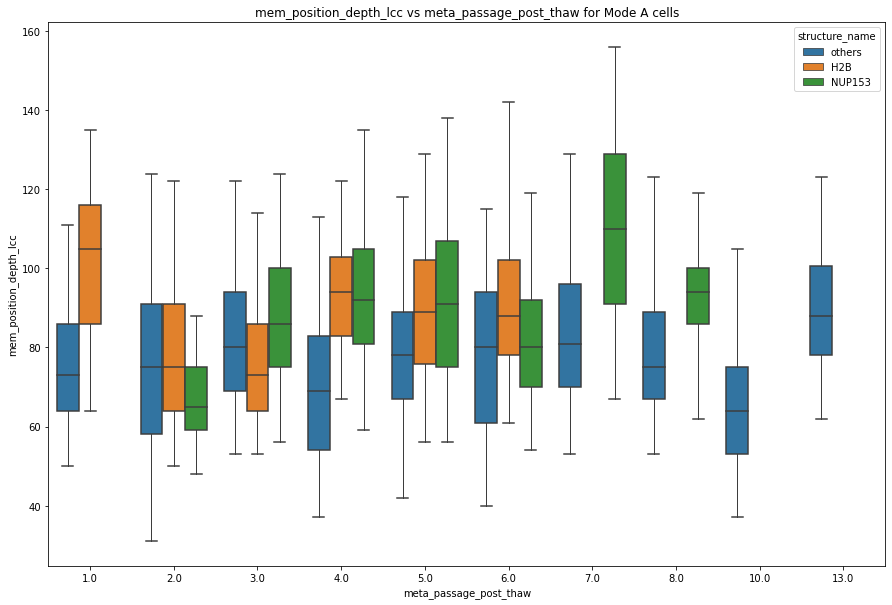

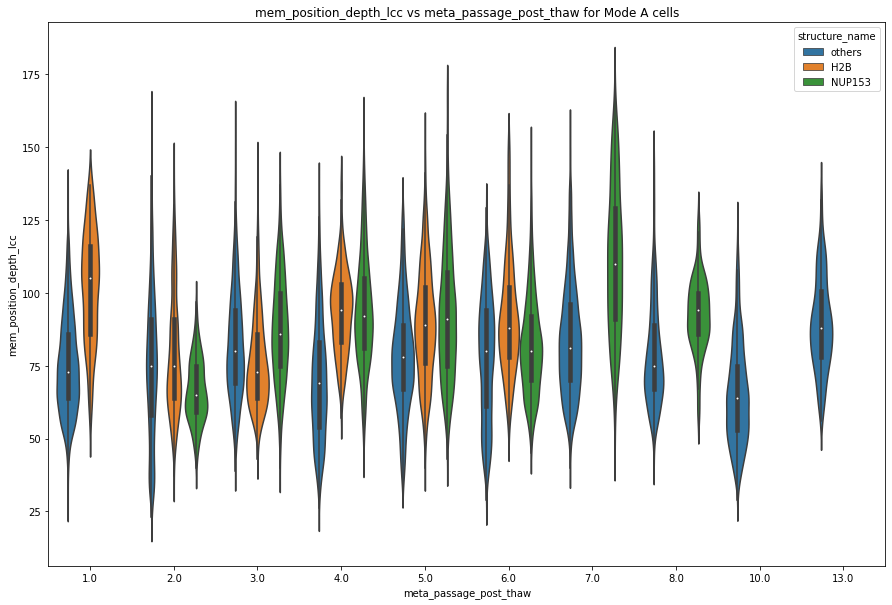

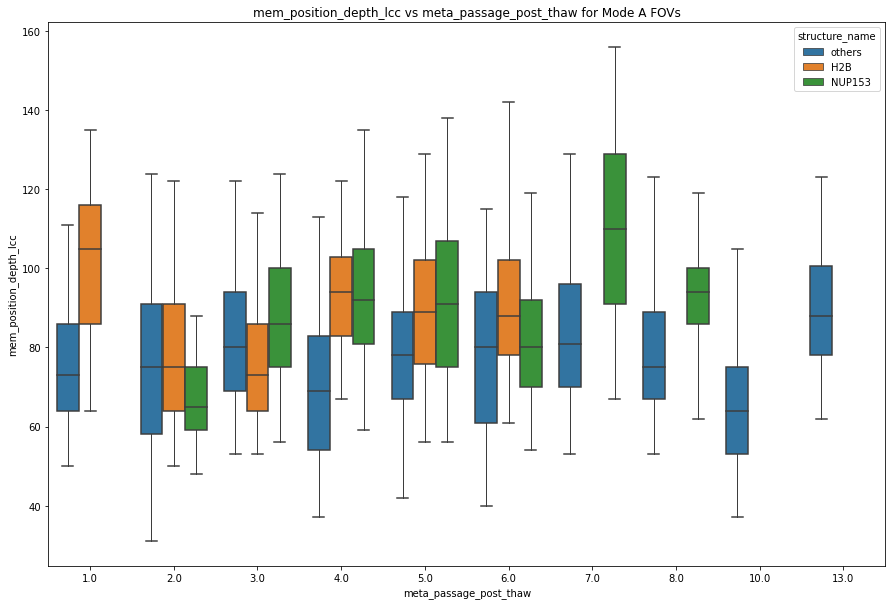

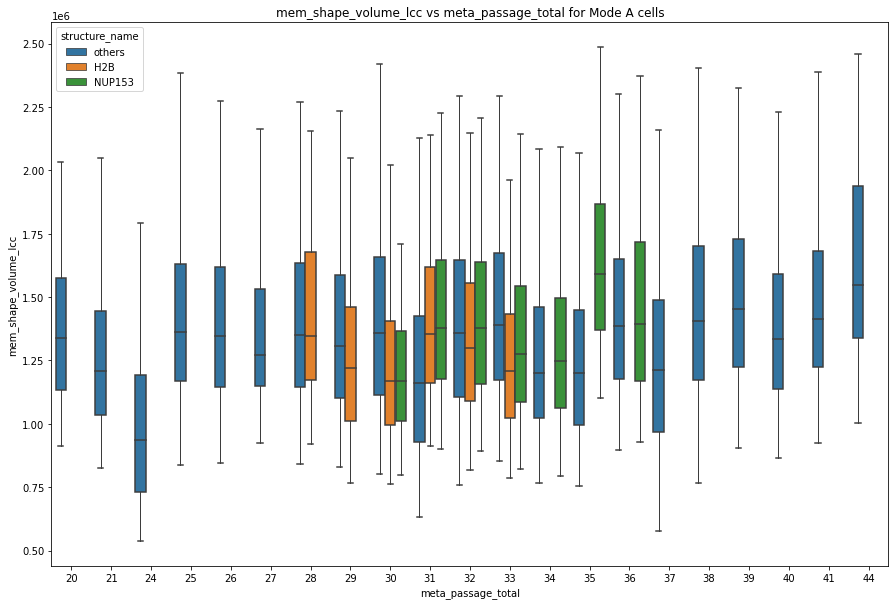

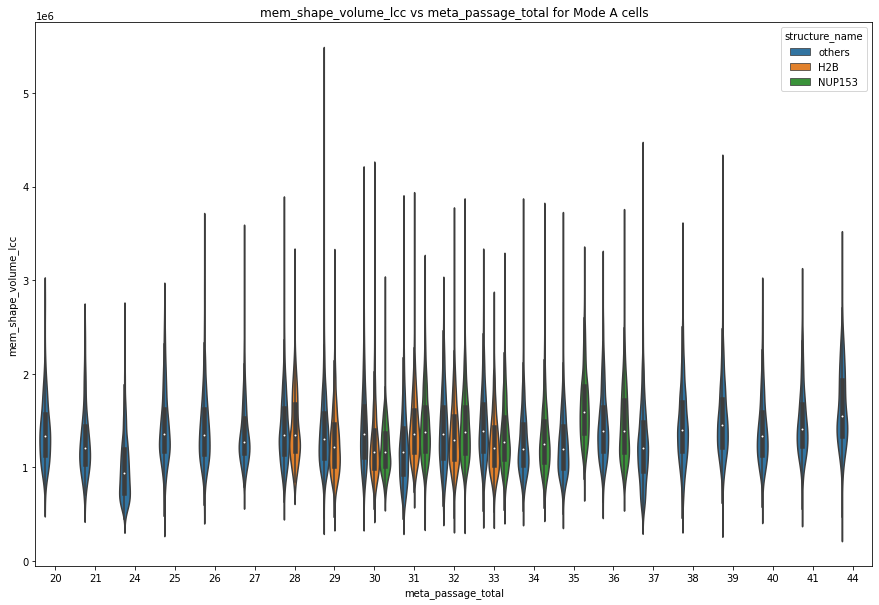

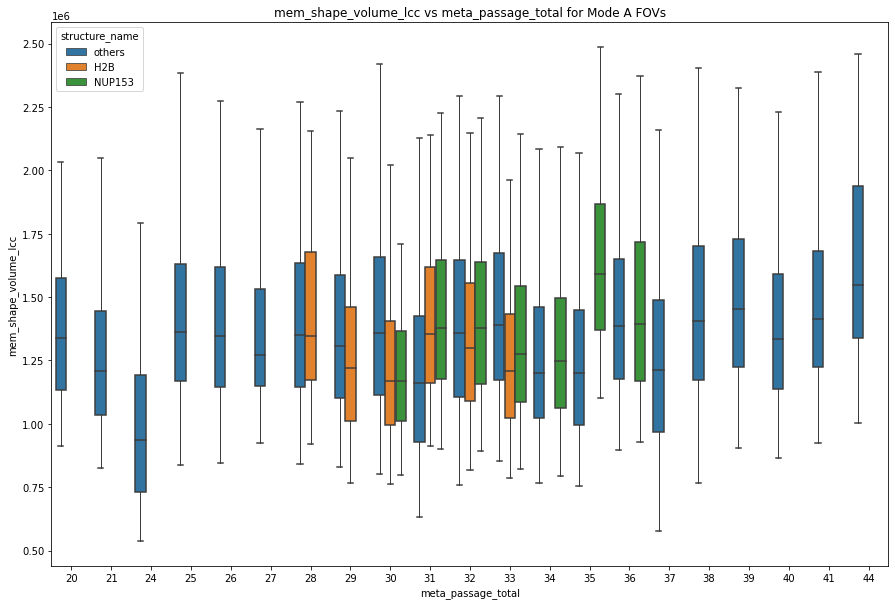

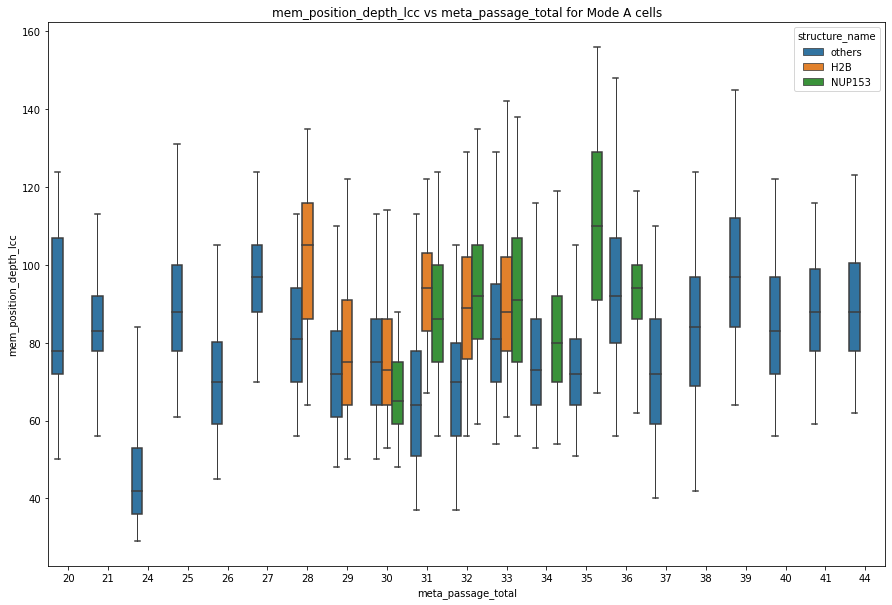

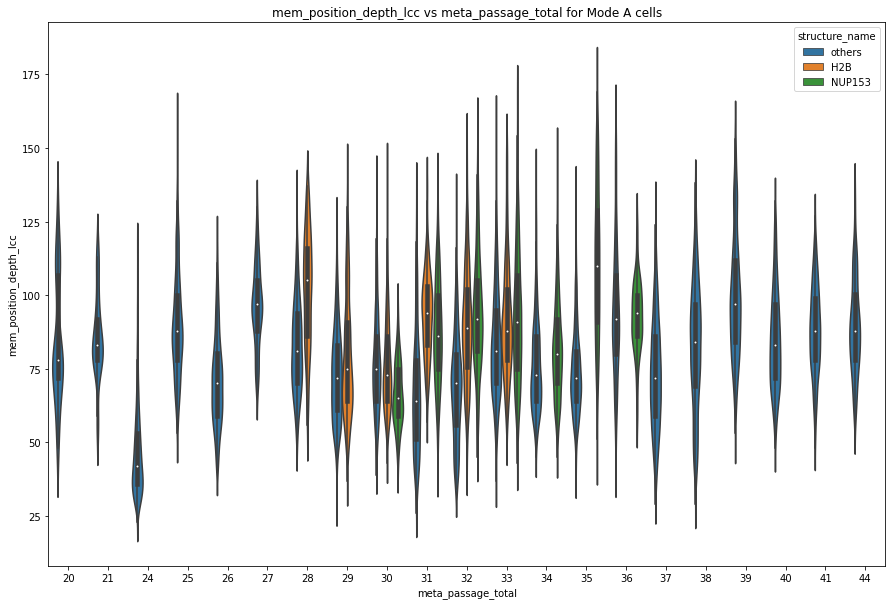

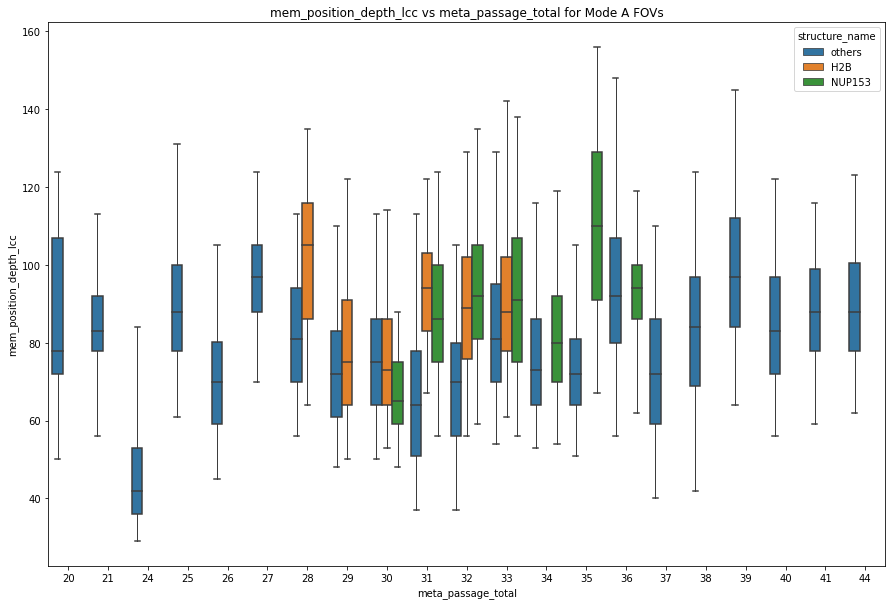

In [32]:
for passage_metric in ['meta_passage_post_thaw', 'meta_passage_total']:
    for density_metric in [# 'expand_density_cell_area_2dmip', 'expand_density_cell_area_2dmid', 'expand_density_neigh_dist_median',
                           'mem_shape_volume_lcc', 'mem_position_depth_lcc']:
        plt.figure(figsize=(15, 10))
        
        sns.boxplot(x=passage_metric, y=density_metric, data=df_cell,
                    hue='structure_name',
                    showcaps=True, # boxprops={'facecolor': 'None'},
                    showfliers=False, whiskerprops={'linewidth': 1},
                    whis=[2.5, 97.5])
        plt.title(density_metric + ' vs ' + passage_metric + ' for ' + mode + ' cells')
        # plt.savefig(os.path.join(plot_folder, 'per_' + imaging_mode[-1] + '_cell_' + density_metric + '_vs_' + passage_metric + '_box.png'))
        plt.show()

        plt.figure(figsize=(15, 10))
        sns.violinplot(x=passage_metric, y=density_metric, data=df_cell,
                    hue='structure_name')
        plt.title(density_metric + ' vs ' + passage_metric + ' for ' + mode + ' cells')
        # plt.savefig(os.path.join(plot_folder, 'per_' + imaging_mode[-1] + '_cell_' + density_metric + '_vs_' + passage_metric + '_violin.png'))
        plt.show()
        
        plt.figure(figsize=(15, 10))
        sns.boxplot(x=passage_metric, y=density_metric, data=df_cell.loc[df_cell['structure_name'].isin(list_structures_more_passages)],
                    hue='structure_name',
                    showcaps=True,  # boxprops={'facecolor': 'None'},
                    showfliers=False, whiskerprops={'linewidth': 1},
                    whis=[2.5, 97.5]
        )
        plt.title(density_metric + ' vs ' + passage_metric + ' for ' + mode + ' FOVs')
        plt.show()
        # plt.savefig(os.path.join(plot_folder, 'per_' + imaging_mode[-1] + '_cell_' + density_metric + '_vs_' + passage_metric + '_box.png'))


## Explore ZSD-1

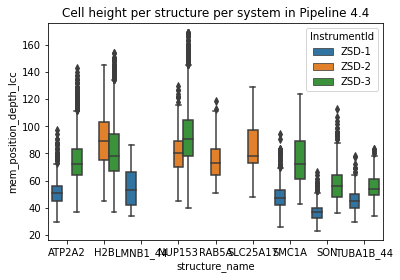

In [27]:
plt.figure()
sns.boxplot(y='mem_position_depth_lcc', x='structure_name', hue='InstrumentId',
            data=df_plot.loc[(df['WorkflowId'] == 'Pipeline 4.4')], # & (df['protocol'] == 'new_matrigel')],
            hue_order=['ZSD-1', 'ZSD-2', 'ZSD-3']
            )
plt.title('Cell height per structure per system in Pipeline 4.4')
plt.show()

In [16]:
df_plot['structure_name'].unique()

array(['AAVS1', 'ACTB', 'ACTN1', 'ATP2A2', 'CETN2', 'CTNNB1', 'DSP',
       'FBL', 'GJA1', 'H2B', 'LMNB1', 'LMNB1_44', 'MYH10', 'NPM1',
       'NUP153', 'PXN', 'RAB5A', 'SEC61B', 'SLC25A17', 'SMC1A', 'SON',
       'ST6GAL1', 'TJP1', 'TOMM20', 'TUBA1B', 'TUBA1B_44'], dtype=object)

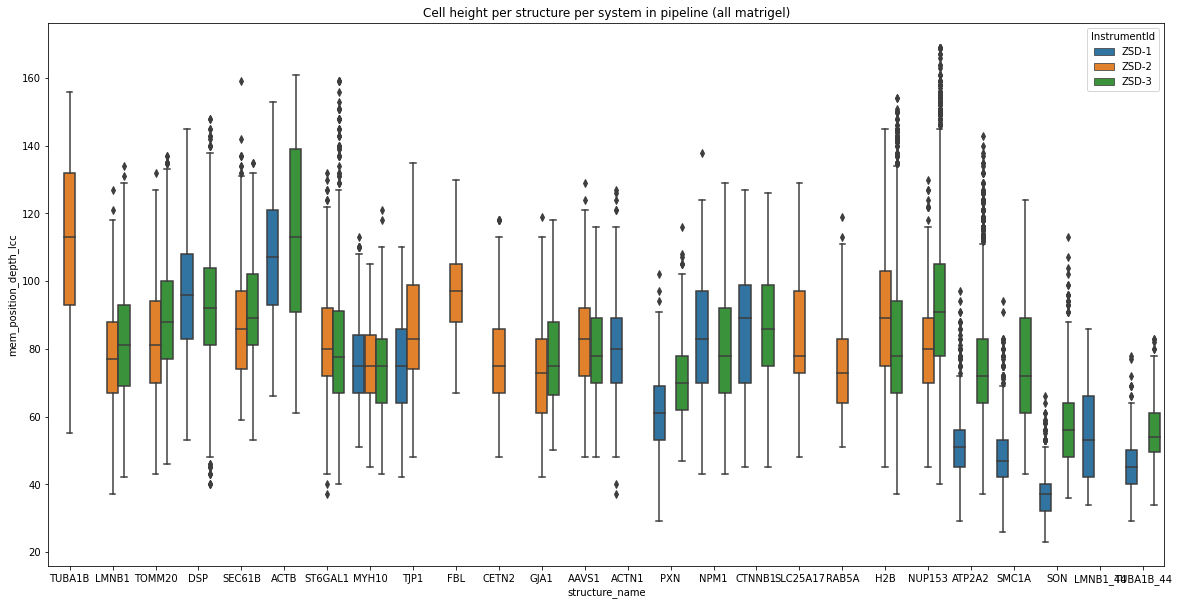

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='mem_position_depth_lcc', x='structure_name', hue='InstrumentId',
            # data=df_plot.loc[(df['protocol'] == 'old_matrigel')],
            data=df_plot,
            hue_order=['ZSD-1', 'ZSD-2', 'ZSD-3'], 
            order=imaging_order
            )
plt.title('Cell height per structure per system in pipeline (all matrigel)')
plt.show()

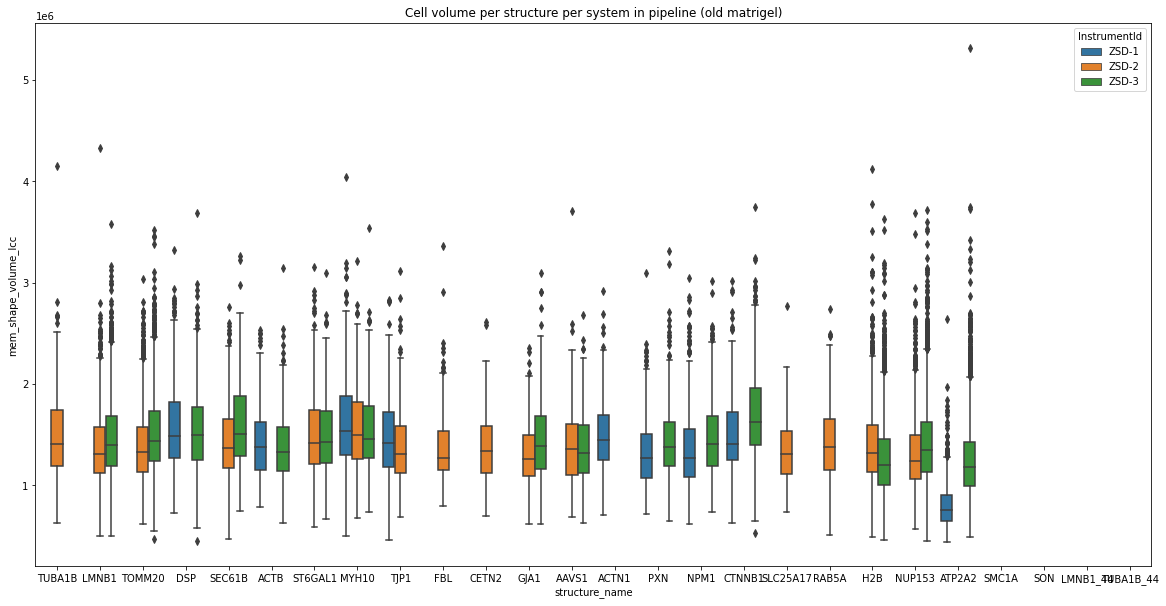

In [29]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='mem_shape_volume_lcc', x='structure_name', hue='InstrumentId',
            data=df_plot.loc[(df_plot['protocol'] == 'old_matrigel')],
            hue_order=['ZSD-1', 'ZSD-2', 'ZSD-3'], 
            order=imaging_order
            )
plt.title('Cell volume per structure per system in pipeline (old matrigel)')
plt.show()